In [51]:
import pandas as pd

In [52]:
#df = pd.read_excel(r"D:\DataScience\Datascience Assignment\15)EastWestAirlines.xlsx")
df = pd.read_excel(r"D:\DataScience\Datascience Assignment\15)EastWestAirlines.xlsx", sheet_name=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:

df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [54]:

df.isnull().sum()
# Exploratory Data Analysis (EDA)
 #Histograms
 
import matplotlib.pyplot as plt

In [55]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [56]:
#  Convert all columns to numeric (BEST FIX)
df = df.apply(pd.to_numeric, errors='coerce')

In [57]:
df = df.fillna(df.mean())

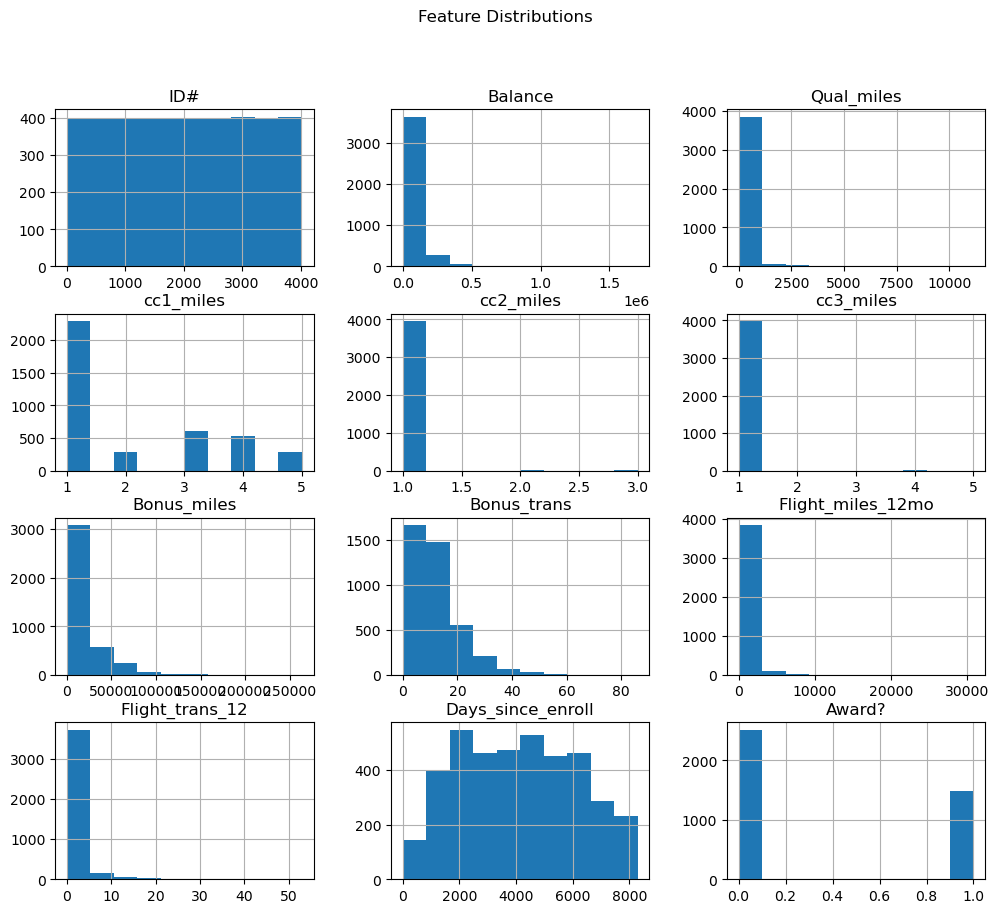

In [58]:
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

In [59]:
# Boxplot (outlier detection)

In [60]:
import seaborn as sns

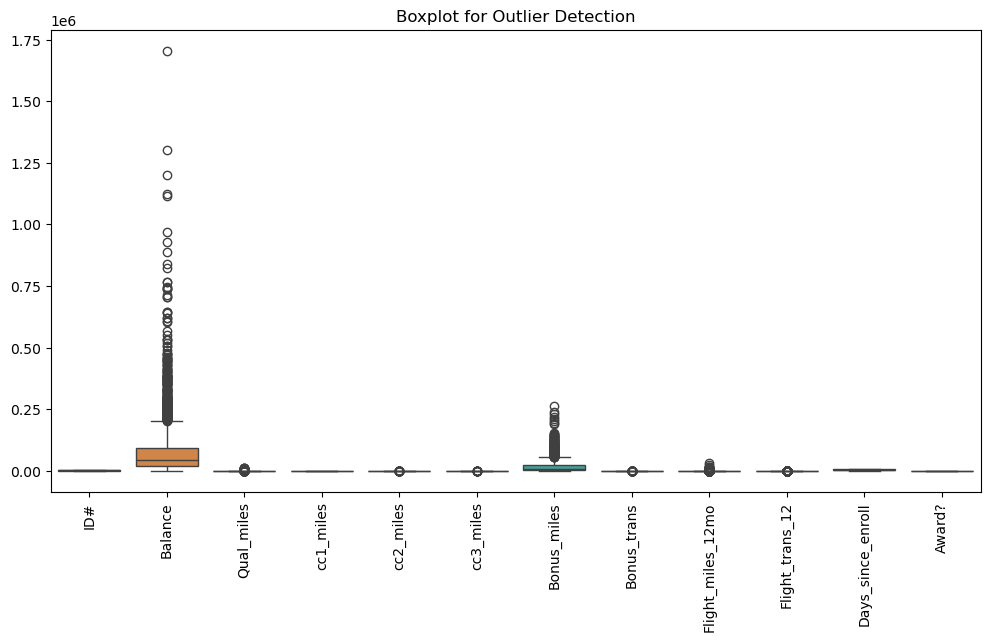

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [62]:
# Correlation Matrix

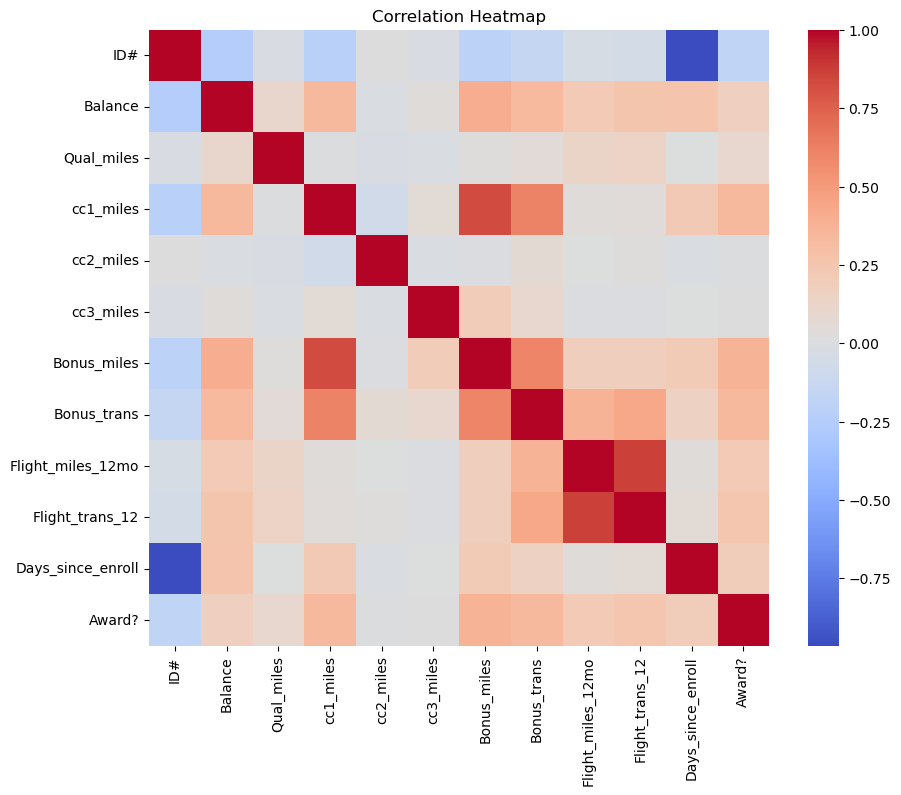

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [64]:
# Feature Scaling

In [65]:
df.isnull().sum()
df = df.fillna(df.mean())

In [66]:
# Check for constant (zero-variance) columns
df.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [67]:
df = df.loc[:, df.nunique() > 1]

In [68]:

from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [70]:
# K-Means Clustering
# Elbow Method (Choosing K)

In [71]:
from sklearn.cluster import KMeans

In [72]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    


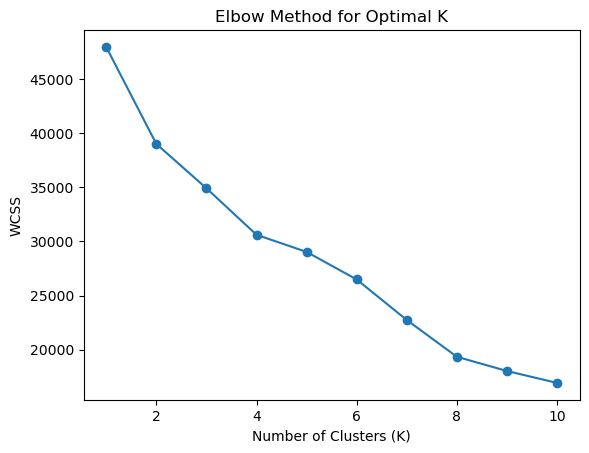

In [73]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [74]:
# Apply K-Means

In [75]:
import pandas as pd

In [76]:
X_unique = pd.DataFrame(X_scaled).drop_duplicates().values

In [77]:
#  K-Means Evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [78]:
print("Silhouette Score (K-Means):", 
      silhouette_score(X_scaled, kmeans_labels))

Silhouette Score (K-Means): 0.201891717665419


In [79]:
# DBSCAN Clustering

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [81]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [100]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)

        # Ignore cases where DBSCAN forms only noise or one cluster
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps}, min_samples={min_s}, clusters={len(set(labels))}, silhouette={score:.3f}")
        else:
            print(f"eps={eps}, min_samples={min_s}, clusters={len(set(labels))} (poor clustering)")


eps=0.3, min_samples=3, clusters=78 (poor clustering)
eps=0.3, min_samples=5, clusters=28 (poor clustering)
eps=0.3, min_samples=10, clusters=7 (poor clustering)
eps=0.5, min_samples=3, clusters=60 (poor clustering)
eps=0.5, min_samples=5, clusters=24 (poor clustering)
eps=0.5, min_samples=10, clusters=13 (poor clustering)
eps=0.7, min_samples=3, clusters=35 (poor clustering)
eps=0.7, min_samples=5, clusters=18 (poor clustering)
eps=0.7, min_samples=10, clusters=11 (poor clustering)
eps=1.0, min_samples=3, clusters=15 (poor clustering)
eps=1.0, min_samples=5, clusters=6 (poor clustering)
eps=1.0, min_samples=10, clusters=3 (poor clustering)


In [101]:
#  DBSCAN cluster count

In [102]:
set(dbscan_labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

In [103]:
# DBSCAN Evaluation

In [104]:
from sklearn.metrics import silhouette_score
import numpy as np

In [105]:
labels_no_noise = dbscan_labels[dbscan_labels != -1]
X_no_noise = X_scaled[dbscan_labels != -1]

In [106]:
n_clusters = len(set(labels_no_noise))

In [107]:
if n_clusters > 1:
    score = silhouette_score(X_no_noise, labels_no_noise)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("Silhouette Score (DBSCAN): Not defined (only one cluster found)")

Silhouette Score (DBSCAN): 0.23700666640348614


In [108]:
# Visualization of Clusters
# K-Means visualization (first two features)

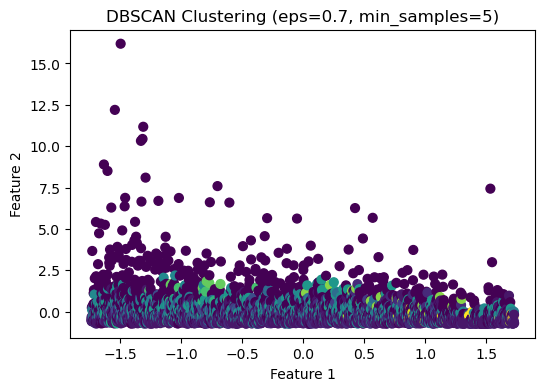

In [109]:
db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=40)
plt.title("DBSCAN Clustering (eps=0.7, min_samples=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

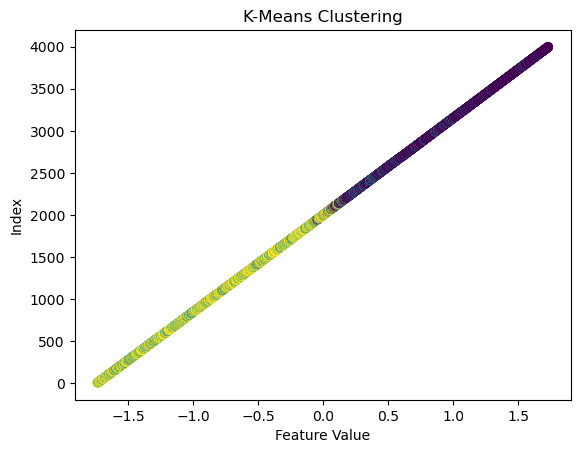

In [110]:
plt.scatter(X_scaled[:,0], range(len(X_scaled)),c=kmeans_labels, cmap='viridis')
plt.xlabel("Feature Value")
plt.ylabel("Index")
plt.title("K-Means Clustering")
plt.show()

In [111]:
# DBSCAN visualization

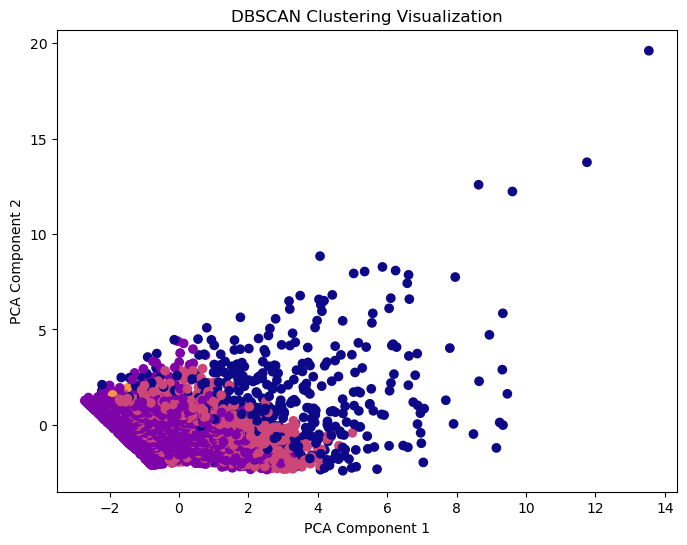

In [112]:
from sklearn.decomposition import PCA

#plt.scatter(X_scaled[:,0], range(len(X_scaled)),
            # c=dbscan_labels, cmap='plasma')
#plt.xlabel("Feature Value")
#plt.ylabel("Index")
#plt.title("DBSCAN Clustering")
#plt.show()



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=dbscan_labels, cmap='plasma')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization")
plt.show()

